<a href="https://colab.research.google.com/github/hariharan-perfectboy/SMART-VISION-TECH/blob/main/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df= pd.read_csv("/content/annual_gold_rate.csv")

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
df.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1980-12-31,614.50,378.19461,263.80259,4831.74943,2278.36795,NaN
1,1981-12-31,459.26,360.90588,227.01948,3966.64790,1691.03194,NaN
2,1982-12-31,375.30,345.59742,215.53232,3553.62680,1378.72895,NaN
3,1983-12-30,423.66,439.89318,279.24936,4270.42821,1557.45790,NaN
4,1984-12-31,360.78,425.91000,269.81553,4067.60433,1324.72272,NaN


In [6]:
df.tail()

,Date,USD,EUR,GBP,INR,AED,CNY
38,2018-12-31,1268.49,1073.57,949.69,86650.56,4659.14,8384.07
39,2019-12-31,1392.60,1244.88,1092.96,98093.13,5114.98,9634.88
40,2020-12-31,1769.59,1549.04,1379.05,131202.92,6499.70,12199.77
41,2021-12-31,1798.61,1520.66,1307.47,132985.88,6606.30,11601.97
42,2022-12-30,1800.09,1710.39,1457.88,141287.27,6611.71,12096.88


In [7]:
df.describe()

,USD,EUR,GBP,INR,AED,CNY
count,43.000000,43.000000,43.000000,43.000000,43.000000,38.000000
mean,738.428605,617.726164,489.274067,37253.302322,2712.468088,5138.873708
std,509.492665,424.760111,385.480957,40543.984865,1871.456854,3527.000666
min,271.040000,253.370850,172.110000,3553.626800,995.520000,926.645180
25%,362.790000,311.100030,222.760000,7461.684985,1332.021930,2259.060000
50%,436.860000,366.066070,251.124830,13721.360600,1603.970990,3346.427445
75%,1237.660000,999.045000,780.275000,73890.780000,4545.875000,8300.102500
max,1800.090000,1710.390000,1457.880000,141287.270000,6611.710000,12199.770000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    43 non-null     object 
 1   USD     43 non-null     float64
 2   EUR     43 non-null     float64
 3   GBP     43 non-null     float64
 4   INR     43 non-null     float64
 5   AED     43 non-null     float64
 6   CNY     38 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.5+ KB


In [9]:
df.isnull()

,Date,USD,EUR,GBP,INR,AED,CNY
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

,0
Date,0
USD,0
EUR,0
GBP,0
INR,0
AED,0
CNY,5


In [11]:
X=df['USD']
y=df['INR']

In [22]:
X=X.values.reshape(-1,1)

In [23]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [34]:
model=LinearRegression()
model.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [35]:
print("Intercept :",model.intercept_)
print("Coeffiecent :",model.coef_)

Intercept : -19186.978549609004
Coeffiecent : [75.44307495]


In [36]:
y_pred=model.predict(X_test)

In [37]:
y_pred

array([75656.28312971, 11682.06442961, 14343.69611401, 75177.21960375,
       76354.13157304, 85875.04763233,  8031.37403255,  6761.66708107,
       13771.08317511])

In [39]:
r2=r2_score(y_test,y_pred)

In [40]:
r2

0.9660585530590351

In [41]:
mse = mean_squared_error(y_test,y_pred)

In [42]:
mse

47223401.46020939

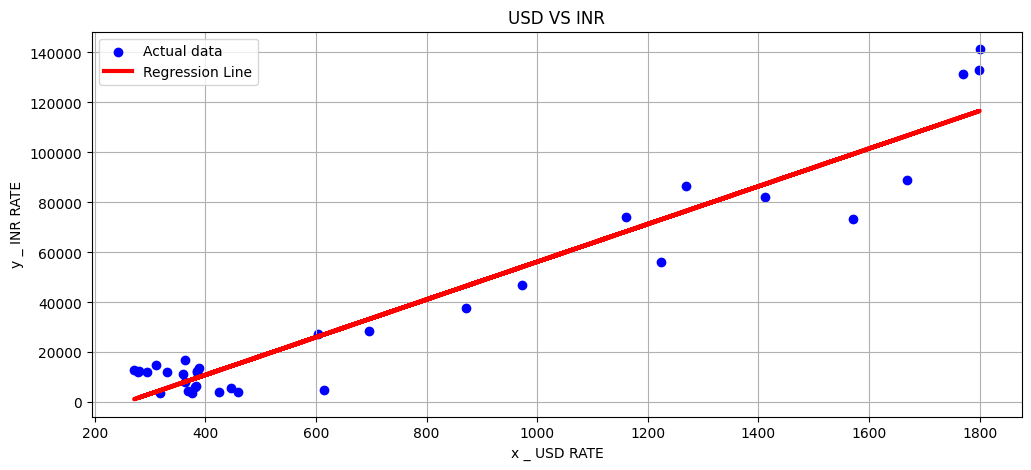

In [43]:
plt.figure(figsize=(12,5))
plt.scatter(X_train,y_train,color="blue",label="Actual data")
plt.plot(X_train,model.predict(X_train),color="red",linewidth=3,label="Regression Line")
plt.title("USD VS INR")

plt.xlabel("x _ USD RATE")
plt.ylabel("y _ INR RATE")
plt.legend()
plt.grid(True)
plt.show()